In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [47]:
def brief_df (df):
  # Подсчитываем пустые значения и уникальные значение
  rows_na =df.isna().sum().reset_index().rename(columns={0: "valuesNa"})
  rows_notna = df.notna().sum().reset_index().rename(columns={0: "valuesNotNa"})
  rows_analysis = pd.merge(rows_na, rows_notna, on="index", how= "outer")
  rows_analysis["completeRatio"] = round((rows_analysis["valuesNotNa"]) / (rows_analysis["valuesNotNa"]+rows_analysis["valuesNa"])*100,2)

  cardinality = df.nunique().reset_index().rename(columns={0: "cardinality"})
  rows_analysis = pd.merge(rows_analysis, cardinality)

  # Размер датасета и кол-во дубликатов
  print("Размер:", df.shape)
  dup_raw = df.duplicated ().sum()
  dup_per = round((dup_raw*100)/df.shape[0],2)
  print ("Дубликаты:", dup_raw, "-&gt;", dup_per, "%")

  # Статистика по пустым значениям
  print("Проверка на отсутсвующие значениия")
  display(rows_analysis)

  # Первые пять строк
  print("Первые пять строк")
  display(df.head())

In [48]:
brief_df(df)

Размер: (891, 12)
Дубликаты: 0 -&gt; 0.0 %
Проверка на отсутсвующие значениия


,index,valuesNa,valuesNotNa,completeRatio,cardinality
0,PassengerId,0,891,100.00,891
1,Survived,0,891,100.00,2
2,Pclass,0,891,100.00,3
3,Name,0,891,100.00,891
4,Sex,0,891,100.00,2
5,Age,177,714,80.13,88
6,SibSp,0,891,100.00,7
7,Parch,0,891,100.00,7
8,Ticket,0,891,100.00,681
9,Fare,0,891,100.00,248


Первые пять строк


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


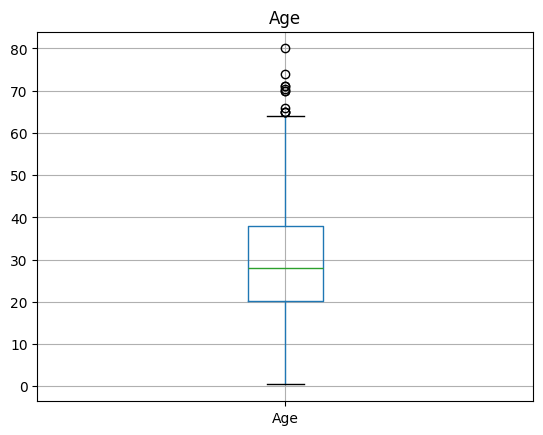

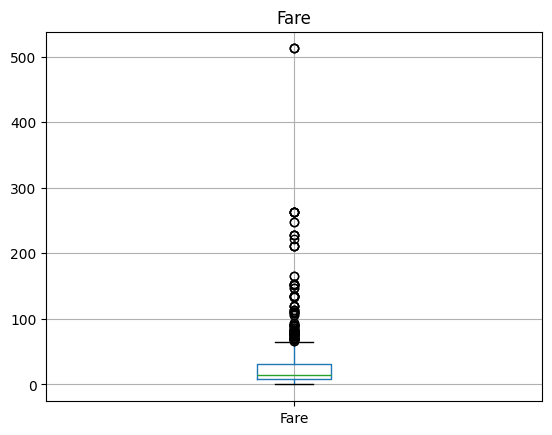

In [49]:
# Строю боксплот, на котором смотрю на выбросы
for column in ['Age', 'Fare']:
    plt.figure()
    df[[column]].boxplot(showfliers=True)
    plt.title(column)

plt.show()

In [50]:
# Определение числовых столбцов для обработки выбросов
numeric_columns = ['Age', 'Fare']

# Определение границ межквартильного размаха для обнаружения выбросов
for col in numeric_columns:
    q1 = titanic_data[col].quantile(0.25)
    q3 = titanic_data[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Удаление выбросов из датасета
    titanic_data = titanic_data[(titanic_data[col] > lower_bound) & (titanic_data[col] < upper_bound)]

# Результат без выбросов
print(titanic_data)


     PassengerId  Survived  Pclass  \
0              1         0       3   
2              3         1       3   
3              4         1       1   
4              5         0       3   
6              7         0       1   
..           ...       ...     ...   
885          886         0       3   
886          887         0       2   
887          888         1       1   
889          890         1       1   
890          891         0       3   

                                             Name     Sex   Age  SibSp  Parch  \
0                         Braund, Mr. Owen Harris    male  22.0      1      0   
2                          Heikkinen, Miss. Laina  female  26.0      0      0   
3    Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1      0   
4                        Allen, Mr. William Henry    male  35.0      0      0   
6                         McCarthy, Mr. Timothy J    male  54.0      0      0   
..                                            ...     ...

In [51]:
# Сравните количество строк (наблюдений) в исходном DataFrame и DataFrame без выбросов
original_length = len(df)
new_length = len(titanic_data)

print(f"Количество строк в исходном датасете: {original_length}")
print(f"Количество строк в датасете без выбросов: {new_length}")

Количество строк в исходном датасете: 891
Количество строк в датасете без выбросов: 571


Деление на тестовую и обучающую выборку

In [52]:
from sklearn.model_selection import train_test_split

# Выбор признаков
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

# Разделение данных на признаки и целевую переменную
X = titanic_data[features]
y = titanic_data['Survived'] #целевая переменная

X = pd.get_dummies(X)  # Преобразование категориальных признаков в числовые

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Результат разделения
print("Train set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)


# test_size - доля данных, которые будут использованы для тестирования (здесь 20%)
# random_state - устанавливает начальное состояние для генератора случайных чисел (для воспроизводимости)

# X_train и y_train - обучающие данные и соответствующая целевая переменная для обучения
# X_test и y_test - тестовые данные и соответствующая целевая переменная для тестов

Train set: (456, 10) (456,)
Test set: (115, 10) (115,)


In [53]:
# Создание и обучение модели
model = DecisionTreeClassifier(max_depth=8)
model.fit(X_train, y_train)

# # Загрузка данных
data = pd.read_csv('test (2).csv')

# Предсказание на тестовых данных
y_pred = model.predict(X_test)

# Оценка качества модели
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.7913043478260869

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84        77
           1       0.68      0.71      0.69        38

    accuracy                           0.79       115
   macro avg       0.76      0.77      0.77       115
weighted avg       0.79      0.79      0.79       115


Confusion Matrix:
[[64 13]
 [11 27]]


In [56]:
# Создание DataFrame
results = pd.DataFrame({'PassengerId': data.PassengerId, 'Survived': y_pred})

#удаление дубликатов
#results.drop_duplicates(subset=['PassengerId'], keep='first', inplace=True)
results.to_csv('results.csv', index=False)


print(results)


ValueError: array length 115 does not match index length 418